<h2> Libraries Import</h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker as ticker
from sklearn.linear_model import SGDClassifier
import time
import re

<h2> Data Import</h2>

In [2]:
Data = pd.read_csv('Amazon_DataSet.csv', dtype = {'reviewText' : str})
Data['Sentiment'] = Data['Sentiment'].replace(['Positive'], 1)
Data['Sentiment'] = Data['Sentiment'].replace(['Negative'], 0)

## Raw Data Visualization

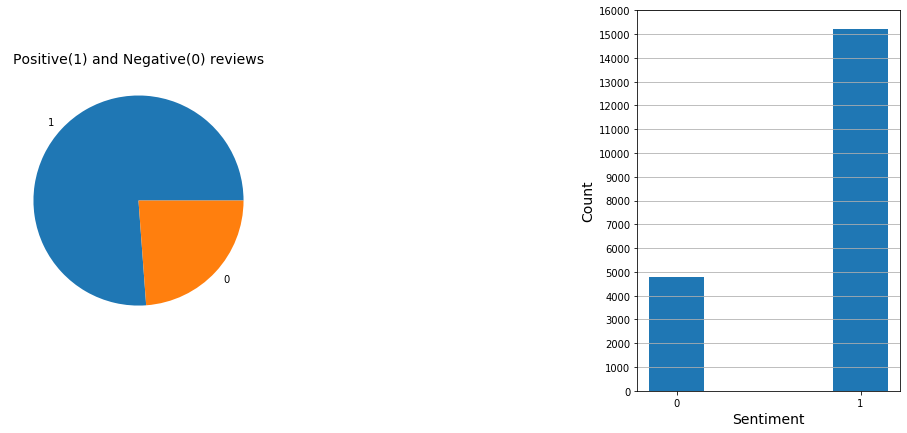

In [3]:
A = Data['Sentiment'].value_counts()

#pie plot
plt.figure(figsize=(16,7))
plt.subplot(1, 3, 1)
A.plot(kind = 'pie')
plt.ylabel("")
plt.title('Positive(1) and Negative(0) reviews', size=14)

#bar plot
plt.subplot(1, 3, 3)
plt.bar(['0', '1'],[A[0], A[1]], width = 0.3)
plt.xlabel('Sentiment', size=14)
plt.grid(axis='y')
plt.yticks(ticks=ticker.MultipleLocator(1000).tick_values(1000, 15000))
plt.ylabel('Count', size=14)
plt.show()

<h2> PreProcessing </h2>

#### Removing null values(if there is any)

In [4]:
Data.isnull().sum()
Data.dropna(inplace=True)

#### setting stemmer and stopwords

In [5]:
stop = stopwords.words('english')
stemmer = SnowballStemmer("english")

In [6]:
#removing stopwords
Data['reviewText'] = Data['reviewText'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))

#word tokenize and stemming method application
Data['reviewText'] = Data['reviewText'].apply(word_tokenize)
Data['reviewText'] = Data['reviewText'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
# Data['reviewText'] = Data['reviewText'].apply(word_tokenize)
# Data['reviewText'] = Data['reviewText'].apply(lambda x: ' '.join([re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", y) for y in x]))

In [7]:
#Tfidvectorize
cv = TfidfVectorizer()
X = cv.fit_transform(Data['reviewText'] ).toarray()
#classification
x_train ,x_test,y_train,y_test=train_test_split(X,Data['Sentiment'], test_size=0.2 , random_state=13)

<h2> Building and Testing Model </h2>

#### using Logistic Regression

In [8]:
model = LogisticRegression()

stt = time.time()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

stp = time.time()
#model accuracy
print(f'model accuracy is : {accuracy_score(y_test,pred) * 100}%, model time consumption is : {stp - stt} second')

model accuracy is : 89.225%, model time consumption is : 13.746323823928833 second


#### using Stochastic Gradient Descent

In [9]:
model1 = SGDClassifier(alpha=10e-5, max_iter=500)

stt = time.time()

model1.fit(x_train,y_train)

pred1 = model1.predict(x_test)

stp = time.time()

print(f'model accuracy is : {accuracy_score(y_test,pred1) * 100}%, model time consumption is : {stp - stt} second')

model accuracy is : 89.725%, model time consumption is : 9.459764003753662 second


# Classification Results

### 1- Logistic Regression

#### Visualizing Classification Report 

In [10]:
report = classification_report(y_test,pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

cm = sns.light_palette("purple", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.870000,0.650000,0.740000,952.000000
1,0.900000,0.970000,0.930000,3048.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.880000,0.810000,0.840000,4000.000000
weighted avg,0.890000,0.890000,0.890000,4000.000000


#### Visualizing Confusion Matrix 

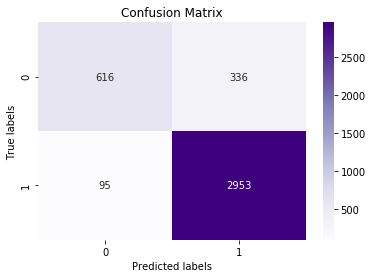

In [11]:
ax= plt.subplot()
cm=confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

### 2- Stochastic Gradient Descent

#### Visualizing Classification Report

In [12]:
report = classification_report(y_test,pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.880000,0.660000,0.750000,952.000000
1,0.900000,0.970000,0.940000,3048.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.890000,0.810000,0.840000,4000.000000
weighted avg,0.900000,0.900000,0.890000,4000.000000


#### Visualizing Confusion Matrix 

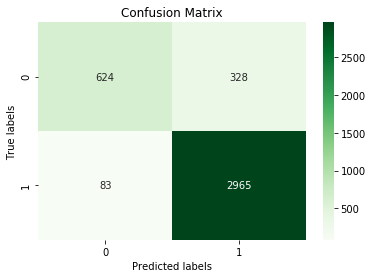

In [13]:
ax= plt.subplot()
cm=confusion_matrix(y_test,pred1)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);